<a href="https://colab.research.google.com/github/MedhaGuha8/AI-Enabled-Heart-Disease-Prediction-Model-for-British-Columbia/blob/main/ECE_470_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECE 470 Project
##AI-Enabled Heart Disease Prediction Model for British Columbia
###Team: Binary Buffoons
###Ben Fisher (V00998691)
###Medha Guha (V00999347)
###Rudra Aryan Potluri (V00944980)
###Vaishakh Vinod Menon (V00939019)


The following notebook contains all the code and comments included for the implementation for the Heart Disease Prediction Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following libraries and packages will be used in this implementation:

In [ ]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy.stats import zscore

from pandas import Series, DataFrame
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

Preprocessing data:

In [ ]:
def preprocess(dataset, column_title, zscore_threshold=3):

    # Calculating zscores values
    z_scores = zscore(dataset[column_title])

    # Finding outliers using the zscore values
    outliers_index = ((z_scores > zscore_threshold) | (z_scores < -zscore_threshold))

    # This function removes the rows of data that contain outliers
    dataset = dataset[~outliers_index]

    # Save the preprocessed csv file as 'preprocessed_file.csv'
    dataset.to_csv('preprocessed_file.csv', index=False)

    return dataset, np.sum(outliers_index)



# Desired columns to be preprocessed
column_title1 = 'chol'
column_title2 = 'thalach'

#Keep this, better accuracy
column_title3 = 'oldpeak'

column_title4 = 'ca'
column_title5= 'age'
column_title6 = 'trestbps'
column_title7 = 'restecg'
column_title8 = 'oldpeak'
column_title9 = 'thal'
column_title10 = 'sex'
column_title11 = 'cp'
column_title12 = 'fbs'
column_title13 = 'exang'
column_title14 = 'slope'

# Zscore threshold
zscore_threshold = 2.5

# Reading the unprocessed csv file
data = pd.read_csv('heart_unprocessed.csv')

# Preprocessing the data according to 'chol' outliers
data, outliers1 = preprocess(data, column_title1, zscore_threshold)

# Preprocessing the data according to 'thalach' outliers
data, outliers2 = preprocess(data, column_title2, zscore_threshold)


data, outliers3 = preprocess(data, column_title3, zscore_threshold)
data, outliers4 = preprocess(data, column_title4, zscore_threshold)
data, outliers5 = preprocess(data, column_title5, zscore_threshold)
data, outliers6 = preprocess(data, column_title6, zscore_threshold)
data, outliers7 = preprocess(data, column_title7, zscore_threshold)
data, outliers8 = preprocess(data, column_title8, zscore_threshold)
data, outliers9 = preprocess(data, column_title9, zscore_threshold)
data, outliers10 = preprocess(data, column_title10, zscore_threshold)
data, outliers11 = preprocess(data, column_title11, zscore_threshold)
data, outliers12 = preprocess(data, column_title12, zscore_threshold)
data, outliers13 = preprocess(data, column_title13, zscore_threshold)
data, outliers14 = preprocess(data, column_title14, zscore_threshold)

# Sum of the outliers dropped from both features
outlier_total = outliers1 + outliers2 + outliers3 + outliers4+outliers5+outliers6+outliers7+outliers8+outliers9+outliers10+outliers11+outliers12+outliers13+outliers14

print(f"Number of outliers removed: {outlier_total}")

Number of outliers removed: 126


In [ ]:


file_path = os.path.join('/content', 'heart_unprocessed.csv')

data = pd.read_csv(file_path)

# print(data.shape)

# print(data.head())
# print(data.tail())

missing_values = data.isnull().sum()
#print(missing_values)

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
# for col in numerical_columns:
#   IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
#   lower_bound = data[col].quantile(0.25) - 1.5 * IQR
#   upper_bound = data[col].quantile(0.75) + 1.5 * IQR
#   outliers = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))]
#   print(f"Outliers in {col}: {outliers.shape[0]}")

zscore_threshold = 2.5  # Any data point with z-score greater than this threshold is considered an outlier

for col in numerical_columns:
    # Calculate z-scores for each data point in the column
    z_scores = zscore(data[col])

    # Find outliers using z-scores
    outliers = data[(z_scores > zscore_threshold) | (z_scores < -zscore_threshold)]

    # Print number of outliers
    print(f"Outliers in {col}: {outliers.shape[0]}")


Outliers in age: 4
Outliers in sex: 0
Outliers in cp: 0
Outliers in trestbps: 24
Outliers in chol: 16
Outliers in fbs: 0
Outliers in restecg: 15
Outliers in thalach: 10
Outliers in exang: 0
Outliers in oldpeak: 17
Outliers in slope: 0
Outliers in ca: 18
Outliers in thal: 7
Outliers in target: 0


Main where the logistic regression model will implemented:

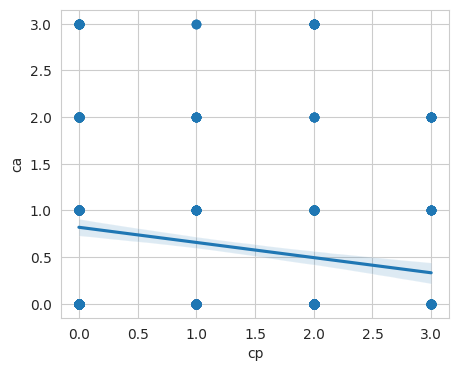

Correlation Coefficient:  -0.20236199554293535 p value:  9.212106848537152e-10 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


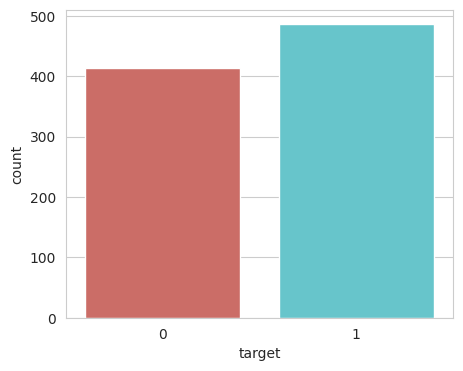

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       899 non-null    int64  
 1   sex       899 non-null    int64  
 2   cp        899 non-null    int64  
 3   trestbps  899 non-null    int64  
 4   chol      899 non-null    int64  
 5   fbs       899 non-null    int64  
 6   restecg   899 non-null    int64  
 7   thalach   899 non-null    int64  
 8   exang     899 non-null    int64  
 9   oldpeak   899 non-null    float64
 10  slope     899 non-null    int64  
 11  ca        899 non-null    int64  
 12  thal      899 non-null    int64  
 13  target    899 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 98.5 KB
None 

Cross-validation scores: [0.84722222 0.88888889 0.93055556 0.86111111 0.81944444 0.88888889
 0.88888889 0.875      0.83333333 0.84507042]
Mean of cross-validation score: 0.8678403755868545 

Training Accuracy: 0.

In [ ]:
# Setting the figure size and style
rcParams['figure.figsize'] = 5, 4
sb.set_style(('whitegrid'))

# Reading the preprocessed csv file
heart = pd.read_csv('preprocessed_file.csv')

heart_data = heart.loc[:, ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')].values

heart_data_names = ['cp', 'ca']

y = heart.loc[:, 'target'].values
# print(y)

# X = heart.drop('target', axis=1)
# y = heart['target']

# This plots the two data sources to determine the dependence between them
sb.regplot(x='cp', y='ca', data=heart, scatter=True)
plt.show()


# Calculating of the correlation coefficient
cp = heart['cp']
ca = heart['ca']
correlation_coefficient, p_value = spearmanr(cp, ca)
print('Correlation Coefficient: ', correlation_coefficient, 'p value: ' ,p_value, '\n')

# Checking to see if any data is missing from dataset
print(heart.isnull().sum())

# Checking that the target (actually named target in data) is binary or ordinal
sb.countplot(x='target', hue='target', data=heart, palette='hls', legend=False)
plt.show()

print(heart.info(), '\n')

# Deploying Logistic Regression Model
X = scale(heart_data)
# X = scale(heart)

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)


#Checking cross validation score of model to ensure model is not overfitting
#Using k fold cross validation
cross_validation_scores = cross_val_score(LogReg_model, X_train, y_train, cv=10)
print("Cross-validation scores:", cross_validation_scores)
print("Mean of cross-validation score:", cross_validation_scores.mean(), '\n')

# Printing training and testing accuracy
print("Training Accuracy:", LogReg_model.score(X_train, y_train))
print("Testing Accuracy:", LogReg_model.score(X_test, y_test))

# Prediction using logistic regression model
y_pred = LogReg_model.predict(X_test)

print(classification_report(y_test, y_pred))